# Projectile motion

![](img/WaterJets.jpg)


## Model


The study of the projectile motion reveals that this kind of motion can be understood as a composition of two motions:
* a **motion with constant velocity** along the horizontal direction ($x$ axis)
* a **motion with constant acceleration** along the vertical direction ($y$ axis)

Here we want to have a closer look to the different aspects of the model adopted for the projectile motion
and finally we want to put together the pieces of the puzzle and construct the **velocity vector**, how it appears in different positions along the trajectory.

We will use the **numpy** module for managing numerical arrays and for evaluating the sine function. 

We will use the **matplotlib** module for generating the plots.

> In the following we will exploit the features of Jupyter Notebook and we will prepare, step by step, suitable lines of Python code for studying our problem.

&nbsp;

#### Import the libraries (modules)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

&nbsp;

#### Assign the values of some known variables

In [2]:
v0 =  4             # magnitude of the initial velocity (m/s)

theta0 = np.pi/4    # angle between the velocity vector at t = 0 and the horizontal direction (radianti)
                    # measured in radians
    
g = 9.8             # acceleration of gravity (m/s^2)


&nbsp;

#### Use the equations for calculating the value of some relevant variables

In [3]:
R = (v0**2) * np.sin(2*theta0) / g   #   horizontal range

tB = 2 * v0 * np.sin(theta0) / g     #   time of flight

h = ((v0*np.sin(theta0))**2)/g       #   maximum altitude


&nbsp;

#### Generate a numerical array of values of time

In particular, we want a set of values linearly spaced in the range between the initial time $t = 0$ and the time of flight $t_B$.

In [4]:
t = np.linspace(0, tB, 128)    

&nbsp;

#### Evaluate the position
We want to calculate the values of the coordinates $x$ and $y$ of the projectile in correspondance with selected values of time.

In [5]:
x = v0 * np.cos(theta0)*t
y = v0 * np.sin(theta0)*t - 0.5 * g * t**2

&nbsp;

#### Evaluate the components of the initial velocity vector

We want to calculate the $x$-component and the $y$-component of the initial velocity vector

In [6]:
v0x = v0 * np.cos(theta0)
v0y = v0 * np.sin(theta0)

&nbsp;

#### Evaluate the components of the velocity vector at each given value of time
Calculate the $x$-component of the velocity in correspondance with each of the values of time contained in the numerical array **t**


In [7]:
vx = np.ones(len(t))*v0x

&nbsp;

Calculate the $y$-component of the velocity in correspondance with each of the values of time contained in the numerical array **t**

In [8]:
vy = v0y - g * t

&nbsp;

#### Plotting the components of the velocity vector vs. time

We want to prepare a figure to show the values of $v_x$ as a function of time and, analogously, the values of $v_y$ as a function of time

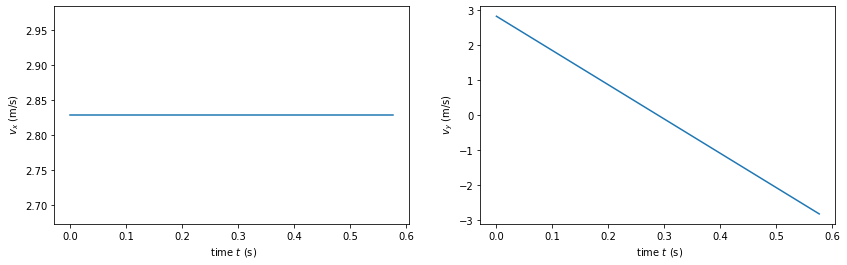

In [9]:
print()
plt.figure(1, figsize = (14,4))

plt.subplot(1, 2, 1)
plt.plot(t,vx)
plt.xlabel(' time $t$ (s)')
plt.ylabel(' $v_x$ (m/s)')

plt.subplot(1, 2, 2)
plt.plot(t, vy)
plt.xlabel(' time $t$ (s)')
plt.ylabel(' $v_y$ (m/s)')

plt.show()

&nbsp;


#### Plotting the coordinates of the projectile vs. time
We want to prepare a figure to show the values of $x$ as a function of time and,
analogously, the values of $y$ as a function of time

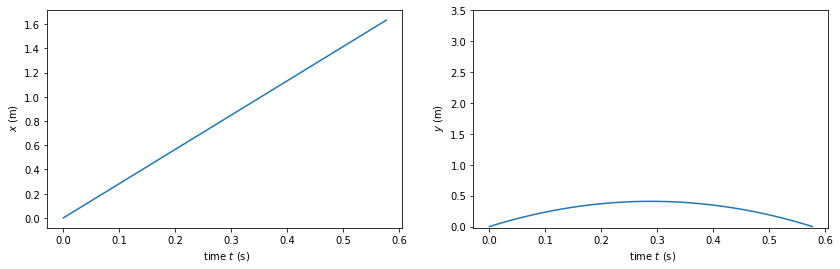

In [10]:
print()
plt.figure(2, figsize = (14,4))

plt.subplot(1, 2, 1)
plt.plot(t,x)
plt.xlabel(' time $t$ (s)')
plt.ylabel(' $x$ (m)')

plt.subplot(1, 2, 2)
plt.plot(t, y)
plt.xlabel(' time $t$ (s)')
plt.ylabel(' $y$ (m)')
plt.ylim(ymax = 3.5)

plt.show()

&nbsp;

#### Plotting the trajectory
We want to construct a curve that represents the trajectory, showing the position of the projectile with respect to the Cartesian axes at several different values of time. 

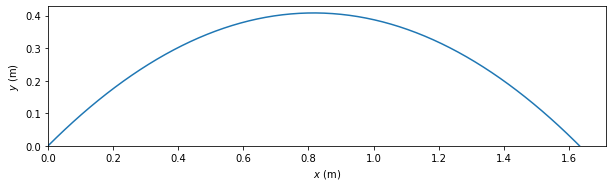

In [11]:
print()
plt.figure(3, figsize = (10,4))
plt.plot(x,y)
plt.xlabel('$x$ (m)')
plt.ylabel('$y$ (m)')
plt.xlim(left=0)
plt.ylim(bottom = 0)

plt.gca().set_aspect('equal', adjustable = 'box')    # this is important

&nbsp;

#### Plotting the velocity vector 'in real time'

The final task is that of representing the velocity vector and its components at several positions along the trajectory.

* We use a slider to choose the value of a numerical index, which corresponds to progressive values of time. The corresponding values of the coordinates $x$ and $y$ will be also printed.

> If you want to run the Python code in the **binder** environment online,
[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/POSS-UniMe/simple-physics-with-Python/HEAD)

In [16]:
import ipywidgets as widgets

sliderMarker = widgets.IntSlider(min = 0, max = (np.size(t)-1), step = 1, value = 0, continuous_update = False)

def calculate(Marker):
        print('Marker = # ',Marker, '\n')
        MarkerTime = t[Marker]   
        print('Time t = ', MarkerTime, 's', '\n')
        Marker_x = x[Marker]
        print('Coordinate x = ', Marker_x, 'm', '\n')
        Marker_y = y[Marker]
        print('Coordinate y = ', Marker_y, 'm', '\n')
        makeplots(Marker)
               
def makeplots(Marker):
    fig04 = plt.figure(4, figsize=(13, 8))
   
    plt.axhline(color = 'gray', zorder = -1)
    plt.axvline(color = 'gray', zorder = -1)
    plt.plot(x,y)
    #plt.plot(x[Marker],y[Marker], 'o', color='red', markersize = 6)
    plt.quiver(x[Marker],y[Marker], vx[Marker], 0, color = 'yellow', scale = v0 * 10 )
    plt.quiver(x[Marker],y[Marker], 0, vy[Marker], color = 'pink', scale = v0 * 10 )
    plt.quiver(x[Marker],y[Marker], vx[Marker], vy[Marker], color = 'cyan', scale = v0 * 10 )
    plt.xlabel('$x$ (m)')
    plt.ylabel('$y$ (m)')
    plt.ylim(ymin = -0.15)
    plt.gca().set_aspect('equal', adjustable = 'box')    # this is important

widgets.interact(calculate, Marker = sliderMarker)

interactive(children=(IntSlider(value=0, continuous_update=False, description='Marker', max=127), Output()), _…

<function __main__.calculate(Marker)>

### Get a feel of

As a consequence of its definition, **the velocity vector is always tangent to the trajectory** of the point-like body.

The interactive plot shown above provides a direct evidence that this statement is correct.

&nbsp;

### Images

Image 1. Water jets in Piazza Cairoli, Messina, Italy.

### Copyright and License
--------------------------
(c) 2021 Andrea Mandanici, Giuseppe Mandaglio, Giovanni Pirrotta. All content is under Creative Common Attribution  <a rel="license" href="https://creativecommons.org/licenses/by/4.0">CC BY 4.0</a> 
 and all code is under [BSD 3-Clause License](https://opensource.org/licenses/BSD-3-Clause).